# Weighted sum

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nl1=2 #no. of nodes of layer 1
nl2=1 #no. of nodes of layer 2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))

In [3]:
w

array([[0.13396284, 0.10644458]])

In [4]:
h

array([array([[0.66198178],
       [0.37715923]]), array([[0.43968854]])], dtype=object)

## bias

In [5]:
b=np.random.rand(nl2,1)
b

array([[0.80582827]])

# Inputs

In [6]:
h[0][0]=5
h[0][1]=2
h[0]

array([[5.],
       [2.]])

# Weighted sum (Feed forward)

In [7]:
cbs=w.dot(h[0])+b[0,0] #with bias
sbs=w.dot(h[0]) #withoout bias
sbs

array([[0.88270335]])

### Sigmoid function

In [8]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
 

##  Perceptron Feedforward

In [9]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #with bias
sbs=sigmoid(w.dot(h[0]))#without bias

print('con bias'+str(bs)+'sin bias'+str(sbs))

con bias[[0.84403096]]sin bias[[0.70738211]]


# Cost function

In [10]:
def cost(y,h):
    C=(y-h)**2
    return C

In [11]:
y=.71
Cb=cost(y,bs)
Cbs=cost(y,sbs)
#Cb=(y-bs)**2
#Cbs=(y-sbs)**2
print('costo con bias'+str(Cb)+'costo sin bias'+str(Cbs))

costo con bias[[0.0179643]]costo sin bias[[6.8533599e-06]]


# Backpropagation

## defining the gradient descents derivates

In [12]:
def dC(y,h): #dC/dh
 dcdh=-2*(y-h)
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [13]:
#Training our perceptron

In [14]:
nl1=2 #nodes in Layer 1
nl2=1 #nodes in Layer 2
etha=.5 #Learning rate 
epoc=100 #number of epochs
#alpha=2
w=np.array((np.random.rand(nl2,nl1)))
#w=np.array([[-1,0]])
#w=np.array([[-5,-1]])
#w=np.array([[-2,0]])
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))
b=np.random.rand(nl2,1) #initialize weights, neurons, and bias matrix
print('pesos iniciales',w)
print('bias inicial',b)
#Determine training matrix 
Dw=np.array(np.random.rand(1,2))
y=np.array(.71) #Determine the "correct answer"
h[0][0]=5 
h[0][1]=2 #Determine inputs
costo=[]
pesos=[]
for e in range(epoc):
 #etha=etha*(np.exp(-alpha*e))   #use it carefully for a variable learning rate
 #z=w.dot(h[0])+b 
 pesos.append(w[0])
 z=w.dot(h[0])
 h[1]=sigmoid(z)#without bias
 C=cost(y,h[1])
 #C=(y-h[1])**2
 Dw=np.transpose(dC(y,h[1])*dh(z)*dz(h[0]))
 Db=dC(y,h[1])*dh(z)
 w=w-(etha*Dw)
 b=b-(etha*Db)
 print('costo',C)
 if C==0:
    print('break in epoch',e)
    break
 costo.append(C[0])
# pesos.append(w[0])

pesos iniciales [[0.77782078 0.68634545]]
bias inicial [[0.79907273]]
costo [[0.08113426]]
costo [[0.08100771]]
costo [[0.08087017]]
costo [[0.0807202]]
costo [[0.08055605]]
costo [[0.08037567]]
costo [[0.08017657]]
costo [[0.07995577]]
costo [[0.0797096]]
costo [[0.07943355]]
costo [[0.07912201]]
costo [[0.07876789]]
costo [[0.07836215]]
costo [[0.07789305]]
costo [[0.07734516]]
costo [[0.07669779]]
costo [[0.07592264]]
costo [[0.07498011]]
costo [[0.07381334]]
costo [[0.07233832]]
costo [[0.07042682]]
costo [[0.06787607]]
costo [[0.06435352]]
costo [[0.0592968]]
costo [[0.05175103]]
costo [[0.0402486]]
costo [[0.02367208]]
costo [[0.00634775]]
costo [[7.98963694e-05]]
costo [[3.1179751e-06]]
costo [[1.72998235e-07]]
costo [[8.99335117e-09]]
costo [[4.74833843e-10]]
costo [[2.49821158e-11]]
costo [[1.31543423e-12]]
costo [[6.92513509e-14]]
costo [[3.64590966e-15]]
costo [[1.91946103e-16]]
costo [[1.0105404e-17]]
costo [[5.32019965e-19]]
costo [[2.80093002e-20]]
costo [[1.47460731e-21]

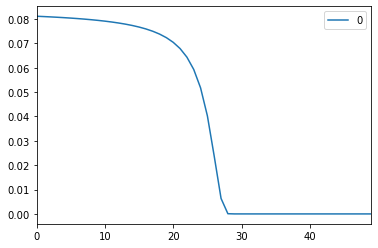

In [15]:
costo1=pd.DataFrame(costo)
costo1.plot()

# Implementation

In [16]:
w #perfect weight with bias [[0.15726836,0.08703549]] perfect weights without bias [[0.09533541,0.20935351]]

array([[0.02499134, 0.38521367]])

In [17]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #con bias
sbs=sigmoid(w.dot(h[0]))#sin bias
sbs

array([[0.71]])

In [18]:
pesos1=pd.DataFrame(pesos)
pesos1[1]

0     0.686345
1     0.683421
2     0.680375
3     0.677194
4     0.673869
5     0.670385
6     0.666727
7     0.662877
8     0.658814
9     0.654516
10    0.649954
11    0.645094
12    0.639898
13    0.634319
14    0.628297
15    0.621762
16    0.614625
17    0.606772
18    0.598057
19    0.588288
20    0.577207
21    0.564462
22    0.549559
23    0.531801
24    0.510212
25    0.483548
26    0.450891
27    0.414701
28    0.388236
29    0.384623
30    0.385353
31    0.385182
32    0.385221
33    0.385212
34    0.385214
35    0.385214
36    0.385214
37    0.385214
38    0.385214
39    0.385214
40    0.385214
41    0.385214
42    0.385214
43    0.385214
44    0.385214
45    0.385214
46    0.385214
47    0.385214
48    0.385214
49    0.385214
50    0.385214
Name: 1, dtype: float64

# Using Keras

In [19]:
import tensorflow as tf #1st part
from tensorflow  import keras 
from tensorflow.keras import layers
import numpy as np

In [20]:
x_train=np.array([[5,2]])
y_train=np.array([[.71]])

In [21]:
#initial_weights=np.array([[-2],[0]]) #this doesn´t work
initial_weights=np.array([[-5],[-1]]) #this works
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(1,activation='sigmoid',use_bias=False))
model.set_weights([initial_weights])
print(model.get_weights())
#After we finished to construct the model we have to "compile" it
weight=model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=.5),metrics=['accuracy'],)
#And then it´s time to train our model 
history=model.fit(x_train,y_train,epochs=100)
#model.evaluate(x_test,y_test,verbose=1)
model.summary()
print(len(model.weights))
print(model.weights)

[array([[-5.],
       [-1.]], dtype=float32)]
Train on 1 samples
Epoch 1/100
1/1 [==============================] - 0s 479ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 2ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 

Epoch 80/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 82/100
1/1 [==============================] - 0s 2ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 83/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 84/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 85/100
1/1 [==============================] - 0s 5ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 86/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 87/100
1/1 [==============================] - 0s 3ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 88/100
1/1 [==============================] - 0s 4ms/sample - loss: 0.5041 - accuracy: 0.0000e+00
Epoch 89/100
1/1 [==============================] - 0s 3ms/sampl

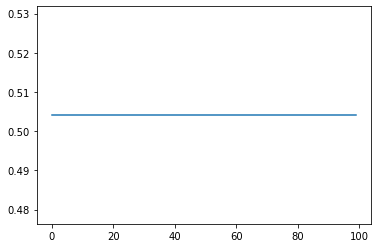

In [24]:
plt.plot(history.history['loss'])

In [25]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-5.],
        [-1.]], dtype=float32)>]

In [26]:
model.predict(x_train)

array([[1.8795289e-12]], dtype=float32)

# Weight valley system  visualization

In [27]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
def z(w1,w2,y):
 return (y-(sigmoid(w1*h[0][0]+w2*h[0][1])))**2
y=.71
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(-1,1,100)
 w2=np.linspace(-1,1,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)

In [29]:
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
 w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(-90, 90,5), azimuth=(-0, 160, 5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=0, description='height', max=90, min=-90, step=5), IntSlider(value=80, d…

In [32]:

def f(altura,azimuth,rang1,rang2):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(rang1,rang2,30)
 w2=np.linspace(rang1,rang2,30)
 w1, w2 =np.meshgrid(w1,w2)
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot_wireframe(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(altura,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, altura=(0, 90,10), azimuth=(0, 120, 5),rang1=(-10,0,.1),rang2=(0,10,.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
#w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)

interactive(children=(IntSlider(value=40, description='altura', max=90, step=10), IntSlider(value=60, descript…